In [1]:
import cv2
import matplotlib.pyplot as plt
import torch

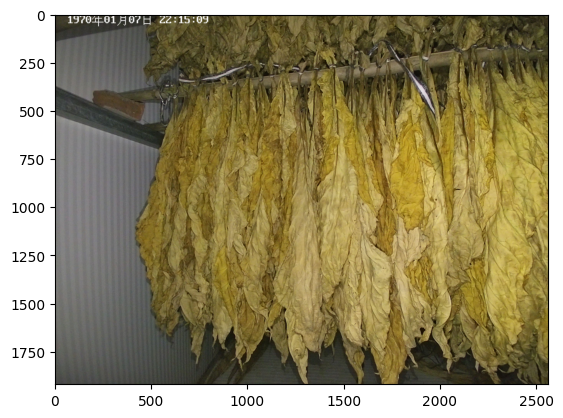

In [15]:
# filename = '/home/llj/code/test/data/20230611/000413_ch01.jpg'
filename = '/home/llj/code/test/data/20230617/091608_ch01.jpg'
img = cv2.imread(filename, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(img)
plt.show()

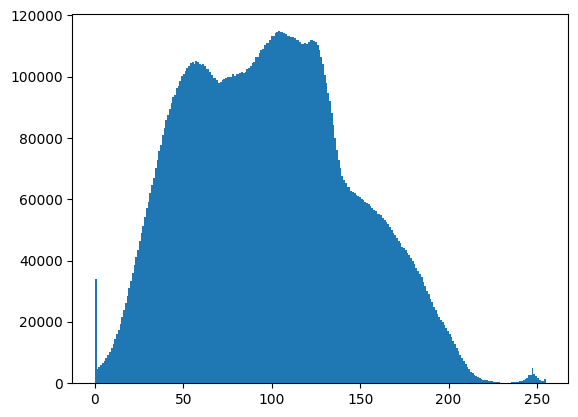

In [16]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

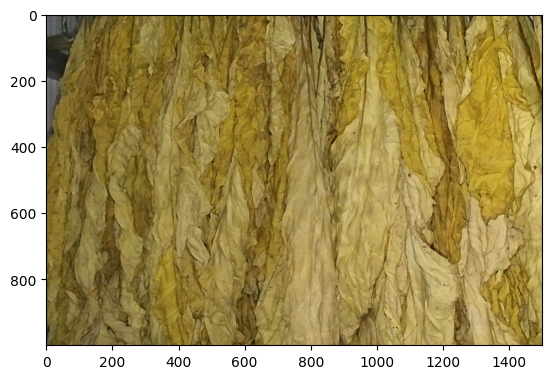

In [17]:
x = 500
y = 500
w = 1000
h = 1500
img = img[x:x + w, y:y + h]
plt.imshow(img)
plt.show()

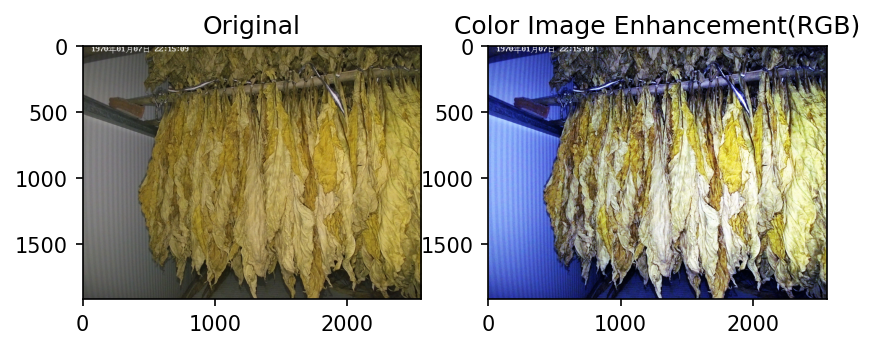

In [6]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def hist_ave_2(src):
    L=np.unique(src)
    cdf=(np.histogram(src.flatten(),L.size)[0]/src.size).cumsum()
    cdf=(cdf*L.max()+0.5)
    return np.interp(src.flatten(),L,cdf).reshape(src.shape)
img=np.array(Image.open("/home/llj/code/test/data/20230617/091608_ch01.jpg"))
img_co=img.copy()
i_r,i_g,i_b=img[:,:,0],img[:,:,1],img[:,:,2]
i_r=hist_ave_2(i_r)
i_g=hist_ave_2(i_g)
i_b=hist_ave_2(i_b)
img_co[:,:,0]=i_r
img_co[:,:,1]=i_g
img_co[:,:,2]=i_b
fig,(ax0,ax1)=plt.subplots(1,2)
fig.dpi=150
ax0.imshow(img)
ax0.set_title("Original")
ax1.imshow(img_co)
ax1.set_title("Color Image Enhancement(RGB)")
plt.show()

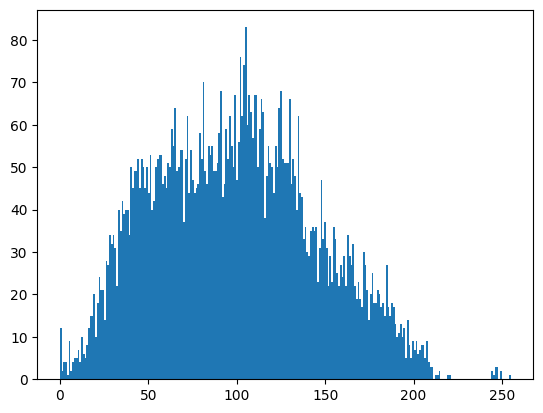

In [7]:
size = (50,50)
img = cv2.resize(img,size)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

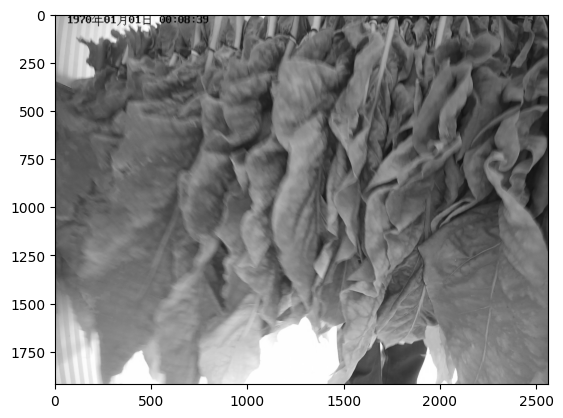

In [19]:
import cv2
import matplotlib.pyplot as plt
filename = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
img = cv2.imread(filename, 1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

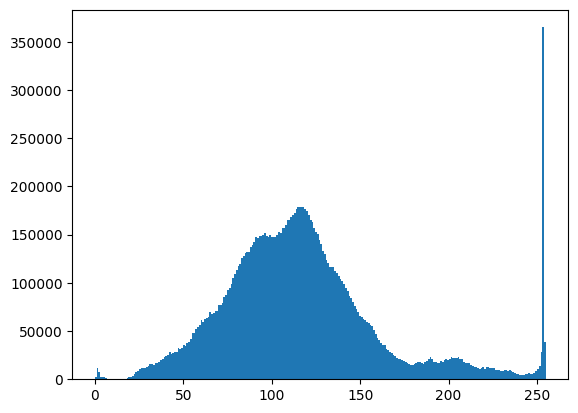

In [20]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

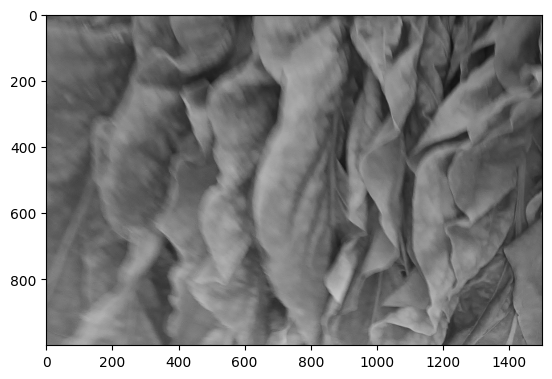

In [21]:
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
plt.imshow(gray)
plt.show()

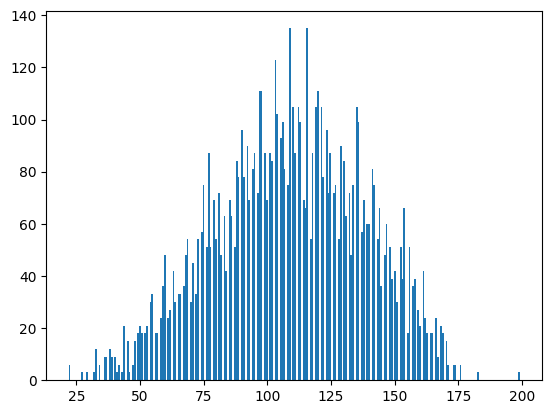

In [22]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

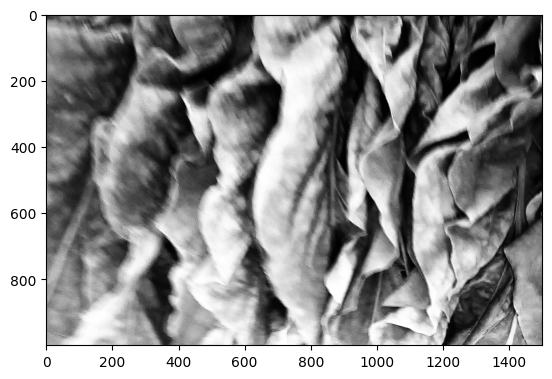

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
gray = cv2.equalizeHist(gray)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

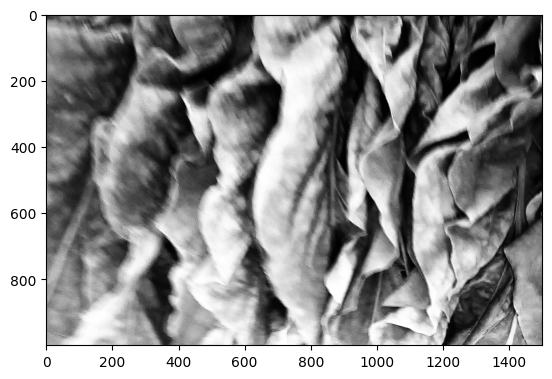

In [24]:
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
plt.imshow(gray)
plt.show()
# cv2.imshow('color_image', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

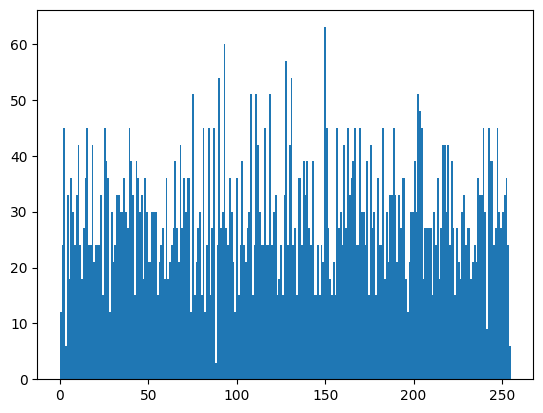

In [25]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

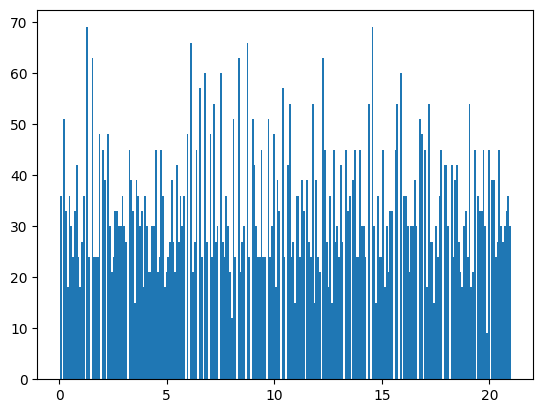

In [26]:
import numpy as np
# 计算累积分布函数
cdf = hist.cumsum()
# 计算均衡化后的像素值
cdf_normalized = cdf * hist.max() / cdf.max()

# 获取均衡化后的图像
equalized_image = np.interp(gray.flatten(), np.arange(256), cdf_normalized).reshape(gray.shape)

plt.hist(equalized_image.ravel(),256)
plt.show()

In [2]:
import cv2
import matplotlib.pyplot as plt

In [1]:
import torch
import numpy as np
x=torch.tensor([0.9801, 0.1800, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])
y=torch.tensor([0.8900, 0.2000, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])

In [35]:
x=x*100
x=x.numpy()
# y=y.numpy()
x=x.astype(int)


array([98, 18, 14, 96, 18, 31, 32, 13])

In [11]:
print(np.sum(x==y))

6


In [2]:
acc = torch.eq(x*100, y*100).float().cpu().mean()
print(acc)

tensor(0.7500)


In [3]:
import glob
import os
all_imgs_path = '/home/llj/code/test/data/20230610/110917_ch01.jpg'#数据文件夹路径
file_path, file_name = os.path.split(all_imgs_path)
parent_path, parent_name = os.path.split(file_path)
# print(parent_name,file_name)
time=(int(parent_name)-20230610)*24+int(file_name[:2])+int(file_name[2:4])/60
print(time)

11.15


In [9]:
import datetime
import time

a = '20220901' # 想被减的时间
a=a[:4]+'-'+a[4:6]+'-'+a[6:]
# print(a)
a_s = tuple(time.strptime(a,"%Y-%m-%d")) # 将格式化时间 转化为 结构化时间
print("时间1",a)

b = time.strftime("%Y-%m-%d") # 获取当前的格式化时间
print("时间2",b)
d1 = datetime.date(a_s[0], a_s[1], a_s[2])
d2 = datetime.date(int(b.split("-")[0]), int(b.split("-")[1]), int(b.split("-")[2]))
print('时间2 - 时间1 的天数是：',(d2 - d1).days)

时间1 2022-09-01
时间2 2023-11-12
时间2 - 时间1 的天数是： 437


In [2]:
import os
import datetime
import time
var = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
file_path, file_name = os.path.split(var)
parent_path, parent_name = os.path.split(file_path)
# print(parent_name,file_name)
parent_name=parent_name[:4]+'-'+parent_name[4:6]+'-'+parent_name[6:]
a_s=tuple(time.strptime(parent_name, "%Y-%m-%d"))
d1 = datetime.date(a_s[0], a_s[1], a_s[2])
start = '20230610'
start = start[:4] + '-' + start[4:6] + '-' + start[6:]
s = tuple(time.strptime(start, "%Y-%m-%d"))
d2 = datetime.date(s[0], s[1], s[2])
# times=(d2 - d1).days*24+int(file_name[:2])+int(file_name[2:4])/60
times=(d2 - d1).days*24+int(file_name[:2])
times = int(times / 6)
print(times)

1


In [14]:
def Acc(t1,t2):
    a1 = int(t1 / 24)
    b1 = t1 % 24
    a2 = int(t2 / 24)
    b2 = t2 % 24
    if a1 == a2 and int(b1 / 4) == int(b2 / 4):
        return True
    return False

In [8]:
x=3
print(x%4)
print(int(x%4))

3
3


In [ ]:
t1=9
t2=7
print(Acc(t1,t2))

In [42]:
import cv2
import math
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import numpy 
import numpy as np

In [43]:
#线性拉伸处理
#去掉最大最小0.5%的像素值 线性拉伸至[0,1]
def stretchImage(data, s=0.005, bins = 2000):    #线性拉伸，去掉最大最小0.5%的像素值，然后线性拉伸至[0,1]
    ht = np.histogram(data, bins);
    d = np.cumsum(ht[0])/float(data.size)
    lmin = 0; lmax=bins-1
    while lmin<bins:
        if d[lmin]>=s:
            break
        lmin+=1
    while lmax>=0:
        if d[lmax]<=1-s:
            break
        lmax-=1
    return np.clip((data-ht[1][lmin])/(ht[1][lmax]-ht[1][lmin]), 0,1)
g_para = {}
def getPara(radius = 5):                        #根据半径计算权重参数矩阵
    global g_para
    m = g_para.get(radius, None)
    if m is not None:
        return m
    size = radius*2+1
    m = np.zeros((size, size))
    for h in range(-radius, radius+1):
        for w in range(-radius, radius+1):
            if h==0 and w==0:
                continue
            m[radius+h, radius+w] = 1.0/math.sqrt(h**2+w**2)
    m /= m.sum()
    g_para[radius] = m
    return m
 
def zmIce(I, ratio=4, radius=300):                     #常规的ACE实现
    para = getPara(radius)
    height,width = I.shape
    zh,zw = [0]*radius + range(height) + [height-1]*radius, [0]*radius + range(width)  + [width -1]*radius
    Z = I[np.ix_(zh, zw)]
    res = np.zeros(I.shape)
    for h in range(radius*2+1):
        for w in range(radius*2+1):
            if para[h][w] == 0:
                continue
            res += (para[h][w] * np.clip((I-Z[h:h+height, w:w+width])*ratio, -1, 1))
    return res
def zmIceFast(I, ratio, radius):                #单通道ACE快速增强实现
    height, width = I.shape[:2]
    if min(height, width) <=2:
        return np.zeros(I.shape)+0.5
    Rs = cv2.resize(I, ((width+1)/2, (height+1)/2))
    Rf = zmIceFast(Rs, ratio, radius)             #递归调用
    Rf = cv2.resize(Rf, (width, height))
    Rs = cv2.resize(Rs, (width, height))
 
    return Rf+zmIce(I,ratio, radius)-zmIce(Rs,ratio,radius)    
            
def zmIceColor(I, ratio=4, radius=3):               #rgb三通道分别增强，ratio是对比度增强因子，radius是卷积模板半径
    res = np.zeros(I.shape)
    for k in range(3):
        res[:,:,k] = stretchImage(zmIceFast(I[:,:,k], ratio, radius))
    return res

In [44]:
img = cv2.imread('/home/llj/code/test/data/20230613/121228_ch01.jpg')
res = zmIceColor(img/255.0)*255
plt.imshow(res)
plt.show()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type


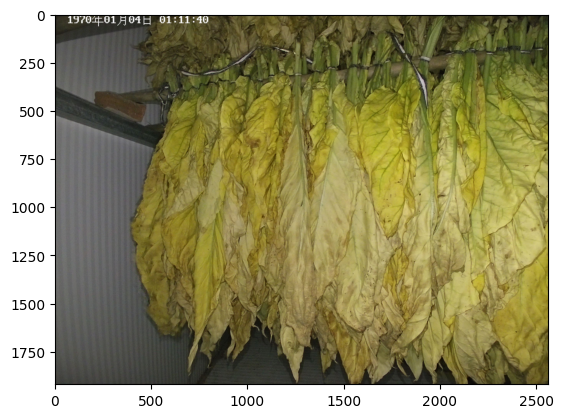

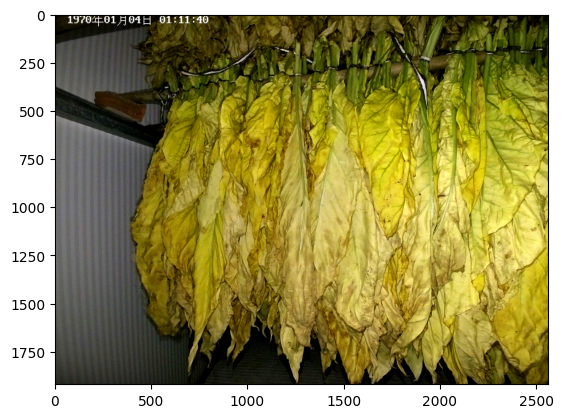

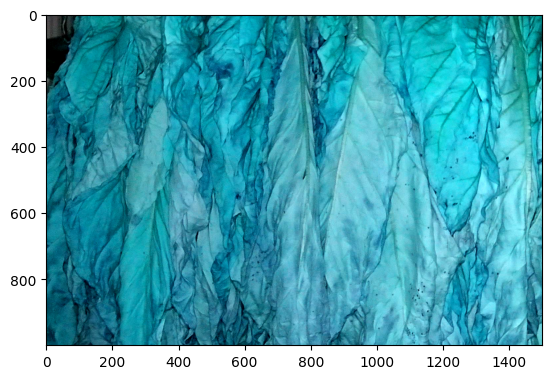

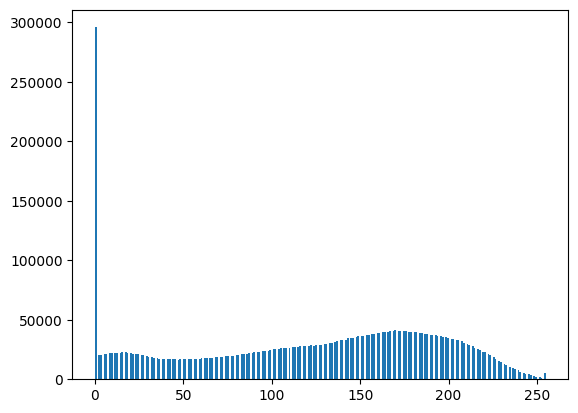

In [36]:
filename = '/home/llj/code/test/data/20230613/121228_ch01.jpg'
# filename = '/home/llj/code/test/data2/20230627/170701_ch01.jpg'
transform = transforms.Compose([
    transforms.ColorJitter(contrast=0.8)
])
img = Image.open(filename).convert('RGB')
plt.imshow(img)
plt.show()
img = transform(img)
plt.imshow(img)
plt.show()
img = cv2.cvtColor(numpy.asarray(img),cv2.COLOR_RGB2BGR)
# img = cv2.imread(filename, 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
x = 500
y = 500
w = 1000
h = 1500
img = img[x:x + w, y:y + h]
plt.imshow(img)
plt.show()
hist_0 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_2 = cv2.calcHist([img], [2], None, [256], [0, 256])
hist_0 = torch.Tensor(hist_0)
hist_1 = torch.Tensor(hist_1)
hist_2 = torch.Tensor(hist_2)
hist = torch.stack((hist_0, hist_1, hist_2), 0)
plt.hist(img.ravel(),256)
plt.show()

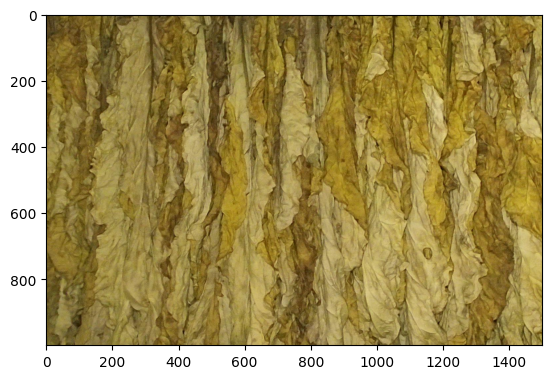

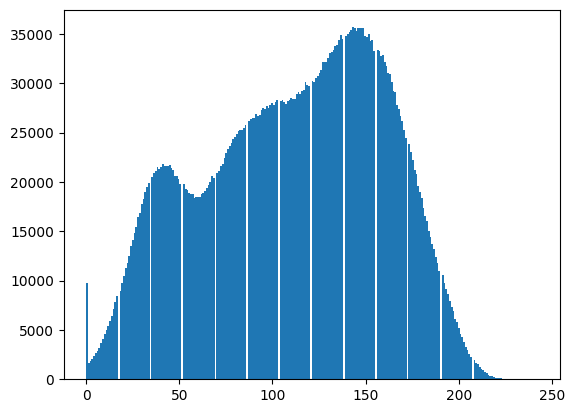

In [6]:
filename = '/home/llj/code/test/data2/20230701/082405_ch01.jpg'
# filename = '/home/llj/code/test/data2/20230627/170701_ch01.jpg'
img = cv2.imread(filename, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
# plt.imshow(img)
# plt.show()
x = 500
y = 500
w = 1000
h = 1500
img = img[x:x + w, y:y + h]
plt.imshow(img)
plt.show()
hist_0 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_2 = cv2.calcHist([img], [2], None, [256], [0, 256])
hist_0 = torch.Tensor(hist_0)
hist_1 = torch.Tensor(hist_1)
hist_2 = torch.Tensor(hist_2)
hist = torch.stack((hist_0, hist_1, hist_2), 0)
plt.hist(img.ravel(),256)
plt.show()

In [1]:
import torch
import numpy as np
x=torch.tensor([0.9801, 0.1000, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])
y=torch.tensor([0.9001, 0.1800, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])

In [2]:
# acc = torch.sub(torch.round(x*100), torch.round(y*100)).float().cpu().mean()
print(abs(torch.sub(torch.round(x * 100), torch.round(y * 100))))
acc = torch.le(abs(torch.sub(torch.round(x * 100), torch.round(y * 100))),6).float().cpu().mean()
print(acc)

NameError: name 'torch' is not defined

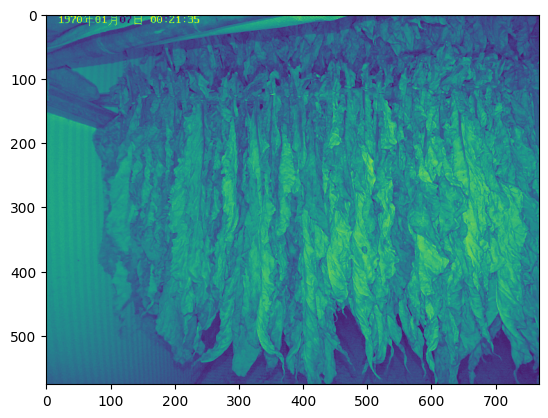

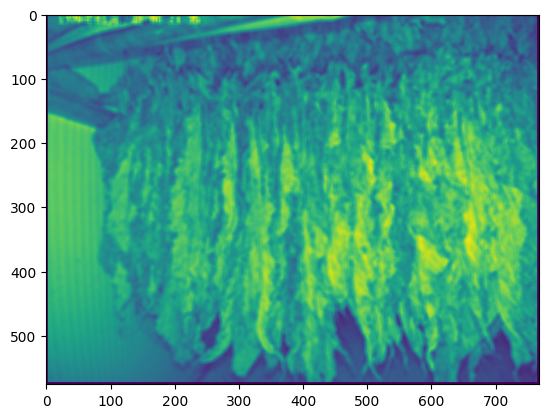

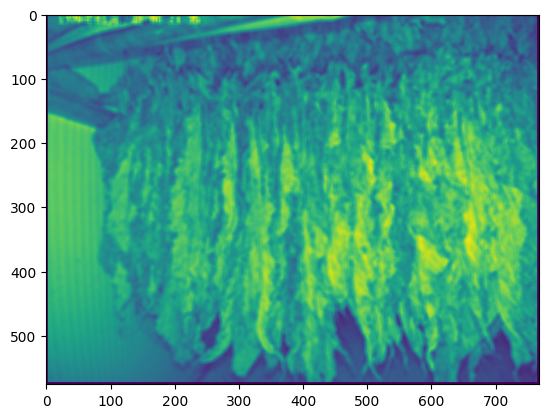

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def mean_filter(image, k):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)

    for i in range(k, height - k):
        for j in range(k, width - k):
            sum = 0
            for x in range(-k, k + 1):
                for y in range(-k, k + 1):
                    sum += image[i + x, j + y]
            output[i, j] = sum // ((2 * k + 1) ** 2)

    return output

def median_filter(image, k):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)

    for i in range(k, height - k):
        for j in range(k, width - k):
            neighborhood = []
            for x in range(-k, k + 1):
                for y in range(-k, k + 1):
                    neighborhood.append(image[i + x, j + y])

# 读取图像
image = cv2.imread('/home/llj/code/test/data2/20230701/082405_ch01.jpg', 0)
image = cv2.resize(image, None, fx=0.3, fy=0.3)

# 调用均值滤波函数
mean_filtered_image = mean_filter(image, 3)
median_filtered_image = mean_filter(image, 3)

# 显示原始图像和滤波后的图像
# cv2.imshow("Original Image", image)
# cv2.imshow("Mean Filtered Image", mean_filtered_image)
# cv2.imshow("Median Filtered Image", median_filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(image)
plt.show()
plt.imshow(mean_filtered_image)
plt.show()
plt.imshow(median_filtered_image)
plt.show()

/tmp/ipykernel_1226327/4024756346.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_image = imageio.imread('/home/llj/code/test/data2/20230701/082405_ch01.jpg')


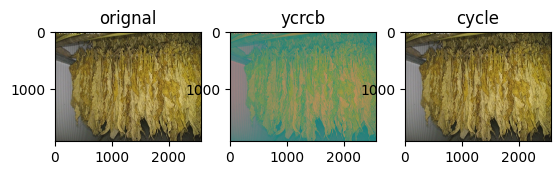

In [4]:
import cv2
import numpy as np
import imageio
import matplotlib.pyplot as plt
rgb_image = imageio.imread('/home/llj/code/test/data2/20230701/082405_ch01.jpg')
ycrcb_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YCR_CB)
cycle_image = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCR_CB2RGB)
images = [rgb_image, ycrcb_image, cycle_image]
titles = ["orignal", "ycrcb", "cycle"]
for i in range(1, len(images)+1):
    plt.subplot(1, 3, i)
    plt.title(titles[i-1])
    plt.imshow(images[i-1]/255)

In [9]:
import numpy as np
import torch

color_hist = np.random.rand(3,256,1) # 随机生成颜色直方图特征
texture_feat = np.random.rand(24,32) # 随机生成纹理特征
color_hist=torch.Tensor(color_hist)
texture_feat=torch.Tensor(texture_feat)
texture_feat=torch.reshape(texture_feat,(3,256,-1))
print(color_hist.shape)
print(texture_feat.shape)
x=torch.cat((color_hist,texture_feat),dim=2)
print(x.shape)
# # 将颜色直方图展开成一维向量
# color_hist = color_hist.flatten()
# 
# # 缩放纹理特征的大小，使其和颜色直方图的维度相同
# texture_feat = np.resize(texture_feat, (768,))
# 
# # 将两个向量合并成一个向量
# merged_feat = np.concatenate((color_hist, texture_feat), axis=0)
# print(merged_feat.shape)
# print(type(merged_feat))

torch.Size([3, 256, 1])
torch.Size([3, 256, 1])
torch.Size([3, 256, 2])


In [13]:
import torch
from torchvision import transforms

# 假设feature是一个形状为(3, 256, 1)的torch.Tensor
feature = torch.randn(1,3, 256, 1)
# print(feature)
# 定义归一化的transform
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# 将特征进行归一化
normalized_feature = normalize(feature)
# print(normalized_feature)
# 纹理特征的处理
texture_feature = torch.randn(1,1,2560, 1920)
# print(texture_feature)
# 调整纹理特征的大小，使其与归一化特征的大小相匹配
texture_feature_resized = torch.nn.functional.interpolate(texture_feature, size=(256, 1), mode='bilinear', align_corners=False)
print(texture_feature_resized.shape)
# print(texture_feature_resized)
# 将归一化的特征与纹理特征合并
combined_feature = torch.cat((normalized_feature, texture_feature_resized), dim=1)
print(combined_feature.shape)

torch.Size([1, 1, 256, 1])
torch.Size([1, 4, 256, 1])
